In [1]:
from bs4 import BeautifulSoup
import pandas
import re
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
with open('../data/poslowie_sejm8.html', 'r') as f:
    html = f.read()

In [4]:
soup = BeautifulSoup(html, 'lxml')

In [5]:
domain = 'http://www.sejm.gov.pl'

In [6]:
poslowie = soup.find_all('div', 'deputyName')

In [7]:
x=poslowie[5]

In [8]:
d = {
    'name' : pandas.Series([str(x.string) for x in poslowie], dtype=str),
    'party' : pandas.Series([str(x.parent.next_sibling.strong.text) for x in poslowie]),
    'link' : pandas.Series([domain+str(x.parent.attrs['href']) for x in poslowie], dtype=str),
    'label' : pandas.Series([str(x.parent.next_sibling.strong.next_sibling.next_element.string) for x in poslowie], dtype=str)
}

In [9]:
df = pandas.DataFrame(data=d)
df = df[['name', 'party', 'label', 'link']]
df.party = df.party.astype('category')

In [10]:
%matplotlib inline

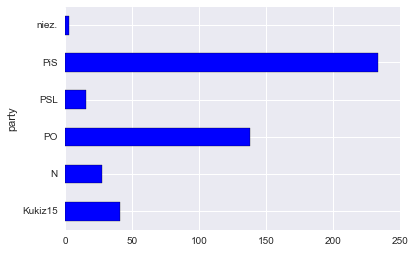

In [11]:
df.groupby('party')['name'].count().plot(kind='barh')

In [12]:
df.to_csv('../data/poslowie_sejm8.csv')